In [1]:
%matplotlib notebook

# Bike Trippin

For this assignment, you will be taking "Cycle Share" data from Seattle and creating charts to determine which gender borrows and uses bikes more often.

* Import your dependencies and then import your data into a pandas data frame from the CSV within the 'Data' folder
* Split up your data into groups based upon the gender column
    * NOTE: There will be a garbage row with a gender of 'stoptime' which you will have to remove!
* Chart your data using a bar graph, giving it both a title and labels for the axes

In [2]:
import matplotlib.pyplot as plt
import pandas as pd 

In [3]:
data_to_load = 'Resources/trip.csv'

In [4]:
bike_data_df=pd.read_csv(data_to_load,low_memory=False)
bike_data_df

,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960
1,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970
2,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988
3,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977
4,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971
...,...,...,...,...,...,...,...,...,...,...
286853,8/31/2016 23:45,SEA00201,679.532,Harvard Ave & E Pine St,2nd Ave & Spring St,CH-09,CBD-06,Short-Term Pass Holder,NaN,NaN
286854,9/1/2016 0:20,SEA00247,1965.418,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN
286855,9/1/2016 0:20,SEA00300,1951.173,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN
286856,9/1/2016 0:20,SEA00047,1883.299,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN


In [5]:
bike_data_df = bike_data_df.dropna()
bike_data_df.head(5)

,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960
1,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970
2,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988
3,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977
4,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971


In [6]:


riders = bike_data_df.groupby('gender')

rider_trips=riders['tripduration'].count()
rider_trips



gender
Female       37558
Male        140564
Other         3431
stoptime         1
Name: tripduration, dtype: int64

In [7]:
#drop the stoptime row that is contained in the group
rider_trips=rider_trips.drop(rider_trips.index[3])


<IPython.core.display.Javascript object>


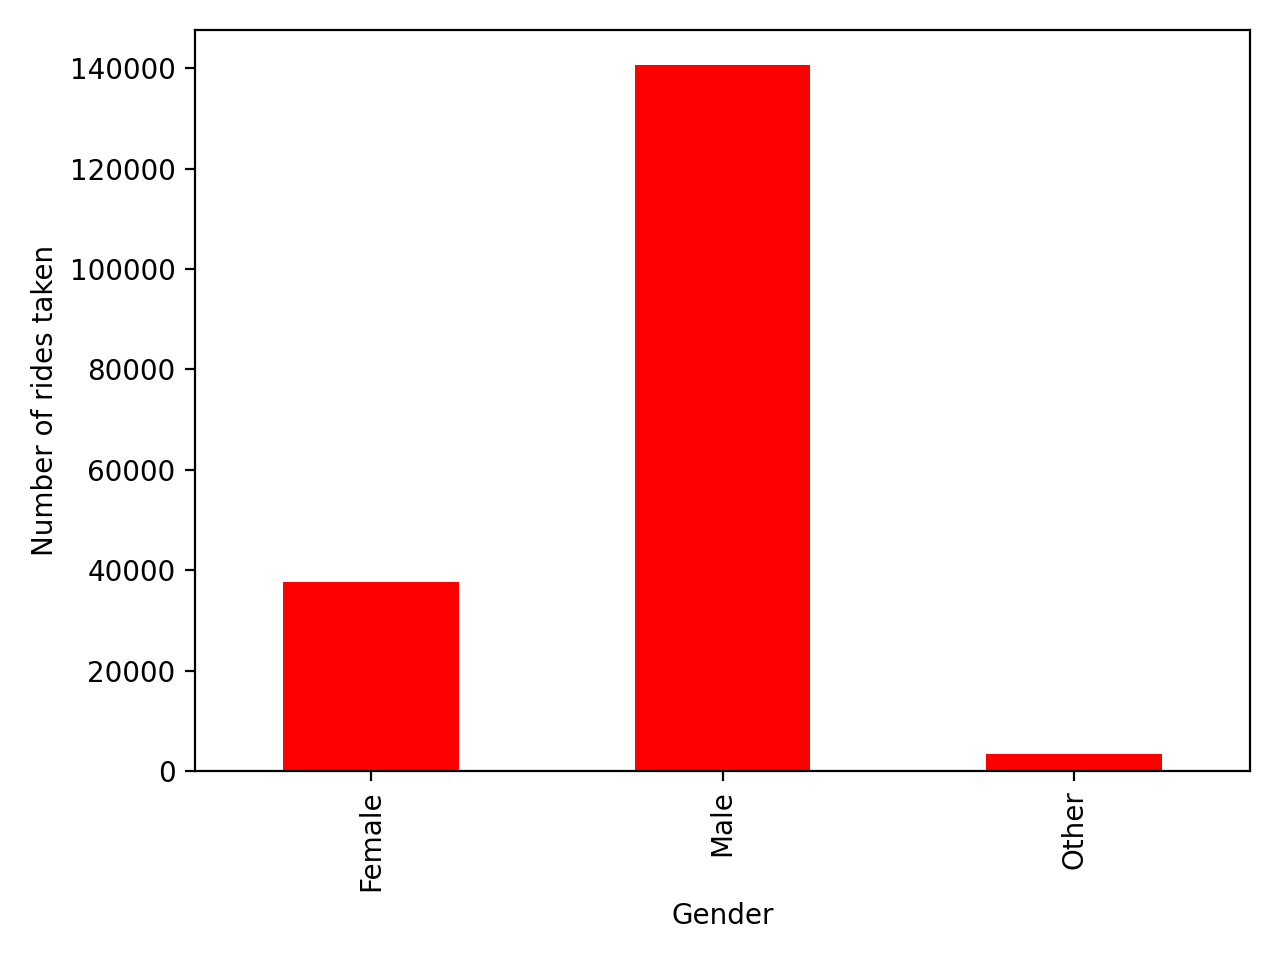

In [8]:

rider_chart=rider_trips.plot(kind ='bar',facecolor= "red")
rider_chart.set_xlabel("Gender")
rider_chart.set_ylabel("Number of rides taken")

plt.show()

plt.tight_layout()

# Bonus!

You will now take the same base data frame before and create some code that will allow you to create individual pie charts for each bike. For this part of the activity, we want you to chart the total 'Trip Duration' of each bike, sorted by gender. Bonus points if you can come up with a method to do this without using loc or iloc to filter the original data frame! You can use loc to filter group data though.

In [9]:
#Group the number of trips taken 
bike_trips = bike_data_df.groupby(['bikeid','gender'])

#Sum the total trips
sum_trips = bike_trips.sum()
sum_trips.head()

tripduration
bikeid   gender              
SEA00001 Female     15876.665
         Male       41150.373
         Other        276.880
SEA00005 Female     20616.240
         Male       60386.328

In [10]:
#get the data fof just 1 bike 
bikeid = 'SEA00001'

one_bike = sum_trips.loc[bikeid]

one_bike

,tripduration
gender,
Female,15876.665
Male,41150.373
Other,276.880


<IPython.core.display.Javascript object>


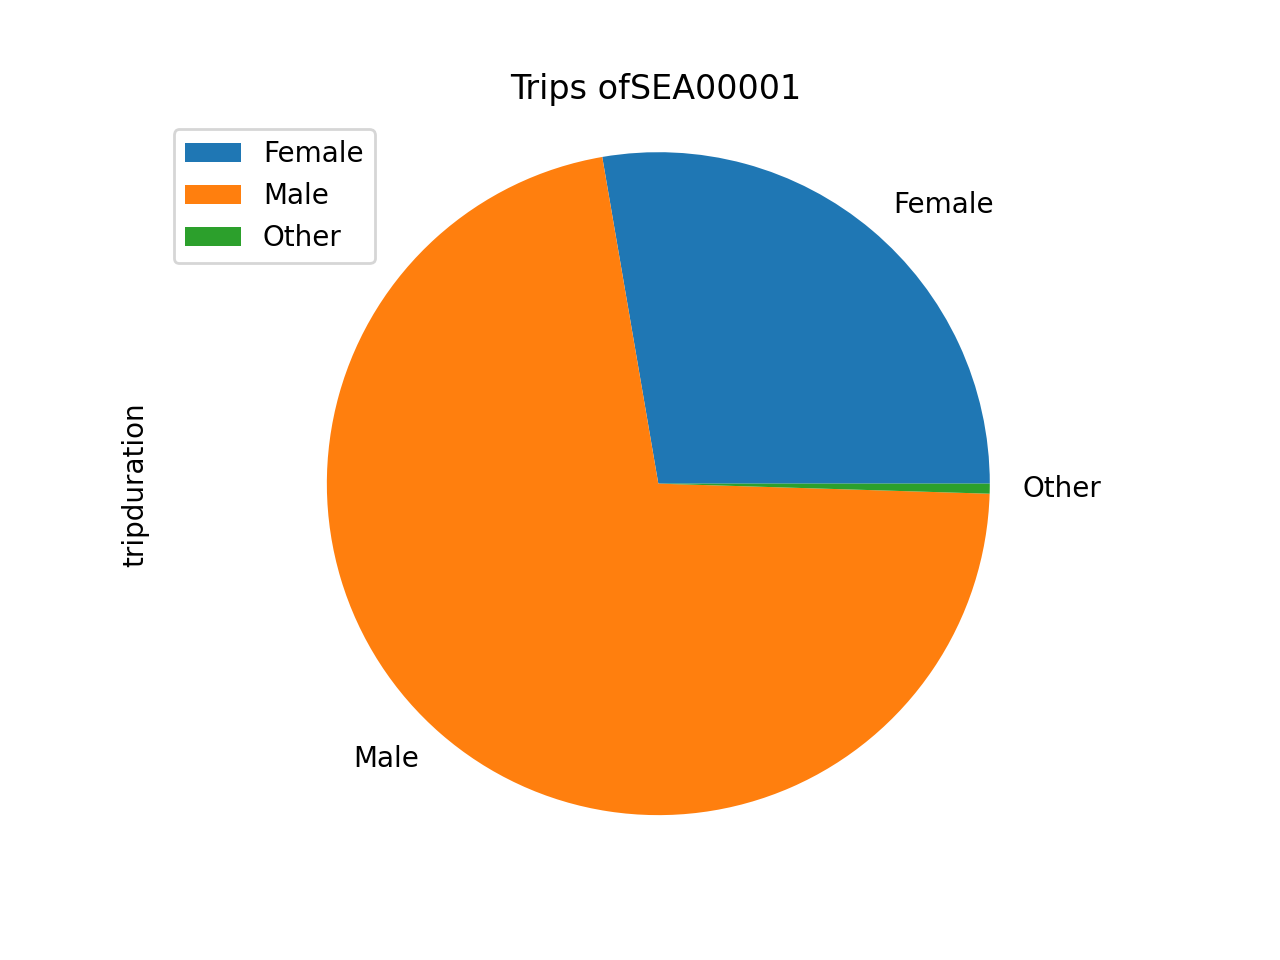

(-1.1147094275724616,
 1.1007004506069709,
 -1.1184745250918073,
 1.1115901234827354)

In [11]:
one_bike.plot(kind='pie',y= 'tripduration',title='Trips of' + bikeid)
plt.axis('equal')
